In [1]:
""" helperfunctions contains the stats and model-fitting stuff. plottingfunctions contains the plotting stuff. """

%run helperfunctions.py
%run plottingfunctions.py

In [2]:
""" Loading and cleaning data. """

raw_data = load_data()

# conical/moored traps are ok below this depth (m)
cutoff = 1000

# we model the water column down to this depth (m)
deep_cutoff = 4000

# all data points above 4000, no trap type filters
all_data = filter_data(raw_data, depth_filter(lambda x: x<=deep_cutoff)) 

# all data points between 1000 and 4000, all trap types are ok here
deep_data = filter_data(raw_data, depth_filter(lambda x: cutoff<=x and x<=deep_cutoff))

# all data points above 1000, all trap types are ok here
shallow_data = filter_data(raw_data, depth_filter(lambda x: cutoff>x))

# all data which comes from sediment traps which either has ok trap type or ok study above 1000m
sediment_trap_data_shallow = get_reliable_trap_data(raw_data, cutoff)

# all data which comes from thorium above 1000m
tracer_data_shallow = get_thorium_data(raw_data, cutoff)

# all data which comes from thorium above 4000m
all_tracer_data = get_thorium_data(raw_data, deep_cutoff)

# combined shallow sediment trap data with all deep data - this is what we use in the analysis
data = np.concatenate((sediment_trap_data_shallow, deep_data))

print('size of poc dataset:', len(raw_data))
print('number of observations shallower than 4000m:', len(all_data))
print('number of observations shallower than 1000m:', len(shallow_data))
print('number of observations between 1000m and 4000m:', len(deep_data))
print('number of tracer observations shallower than 1000m:', len(tracer_data_shallow))
print('number of tracer observations shallower than 4000m:', len(all_tracer_data))
print('number of ok sediment trap observations shallower than 1000m:', len(sediment_trap_data_shallow))

['ID (Reference identifier)', 'ID (Unique location identifier)', 'Type (Data type)', 'Latitude', 'Longitude', 'Type (Sediment trap type)', 'Elevation [m a.s.l.] (Total water depth)', 'Bathy depth [m] (ETOPO1 bathymetry)', 'Depth water [m] (Sediment trap deployment depth)', 'Date/Time (Deployed)', 'Date/time end (Retrieved)', 'Duration [days]', 'Area [m**2] (Surface area of trap)', 'Flux tot [mg/m**2/day]', 'Flux std dev [±]', 'C flux [mg/m**2/day]', 'C flux std dev [±]', 'POC flux [mg/m**2/day]', 'POC flux std dev [±]', 'PIC flux [mg/m**2/day]', 'PIC flux std dev [±]', 'PON flux [mg/m**2/day]', 'PON flux std dev [±]', 'POP flux [mg/m**2/day]', 'POP flux std dev [±]', 'PSi flux [mg/m**2/day]', 'PSi flux std dev [±]', 'PSiO2 flux [mg/m**2/day]', 'PSi(OH)4 flux [mg/m**2/day]', 'PAl [mg/m**2/day]', 'PAl std dev [±]', 'Chl flux [mg/m**2/day]', 'Pheop flux [µg/m**2/day]', 'CaCO3 flux [mg/m**2/day]', 'CaCO3 flux std dev [±]', 'Fe flux [mg/m**2/day]', 'Mn flux [µg/m**2/day]', 'Ba flux [µg/m**2

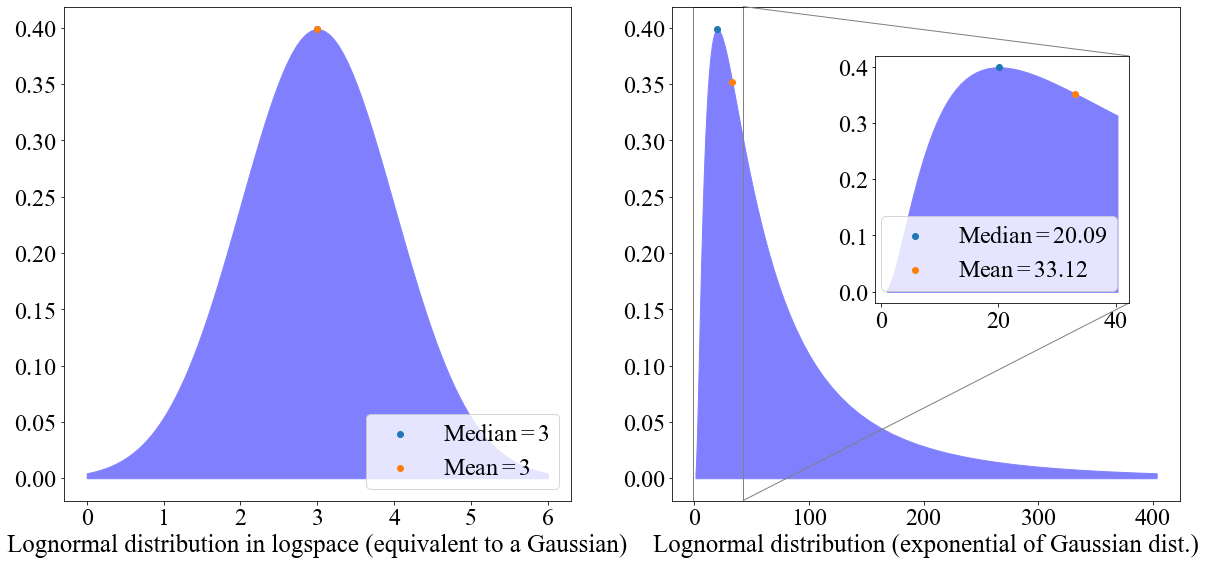

In [3]:
""" An example lognormal distribution. """

plot_example_lognormal(3, 1)

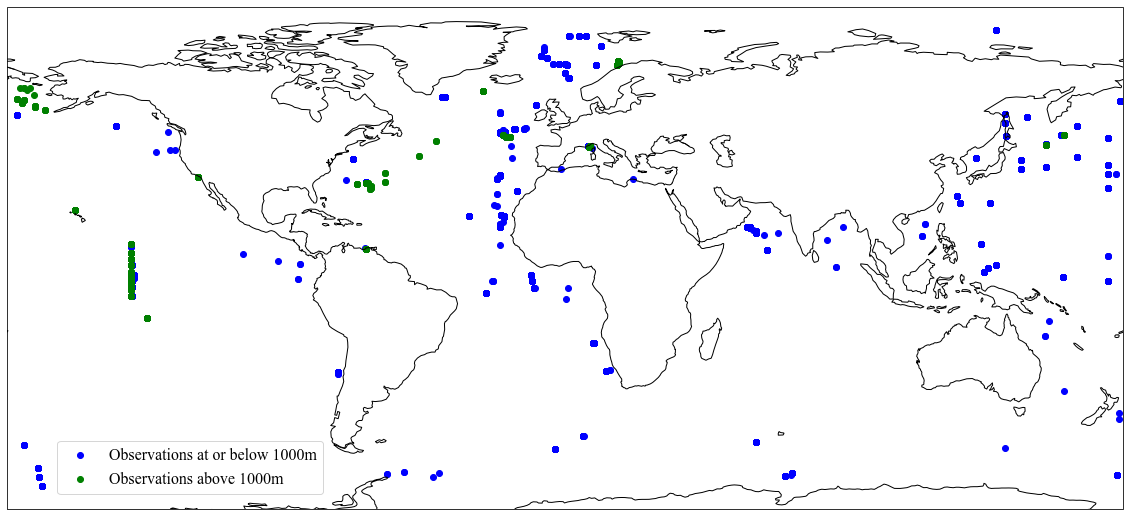

In [4]:
""" The global distribution of our dataset after filtering by sediment trap type. """

plot_world_scatterplot(sediment_trap_data_shallow, deep_data)

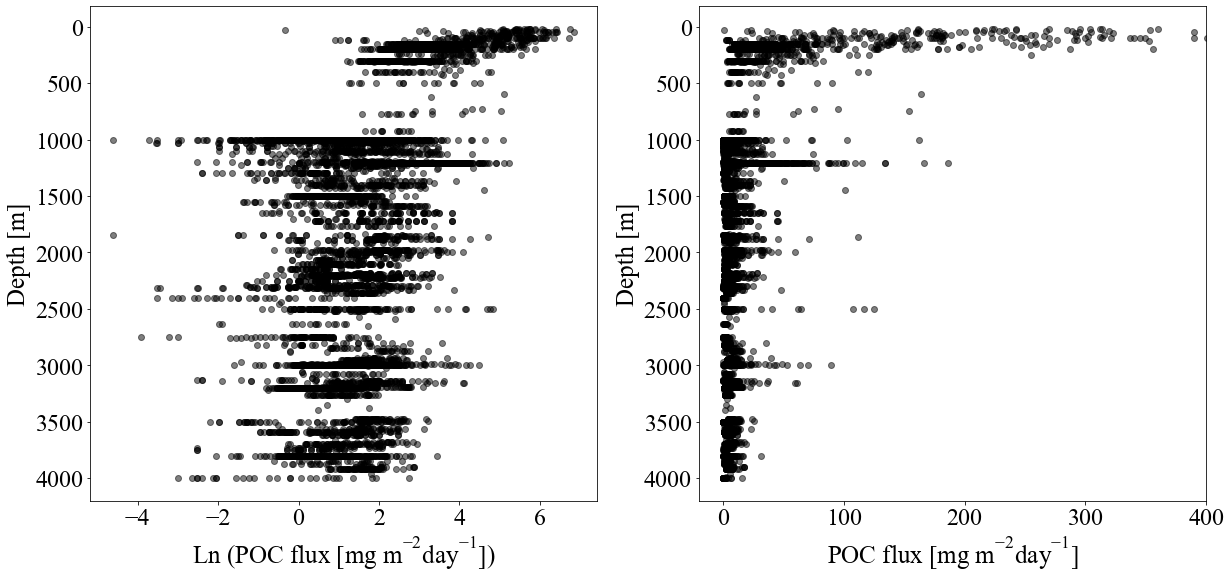

In [5]:
""" The depth distribution of our dataset after filtering by sediment trap type. """

plot_basic_scatterplot(data)

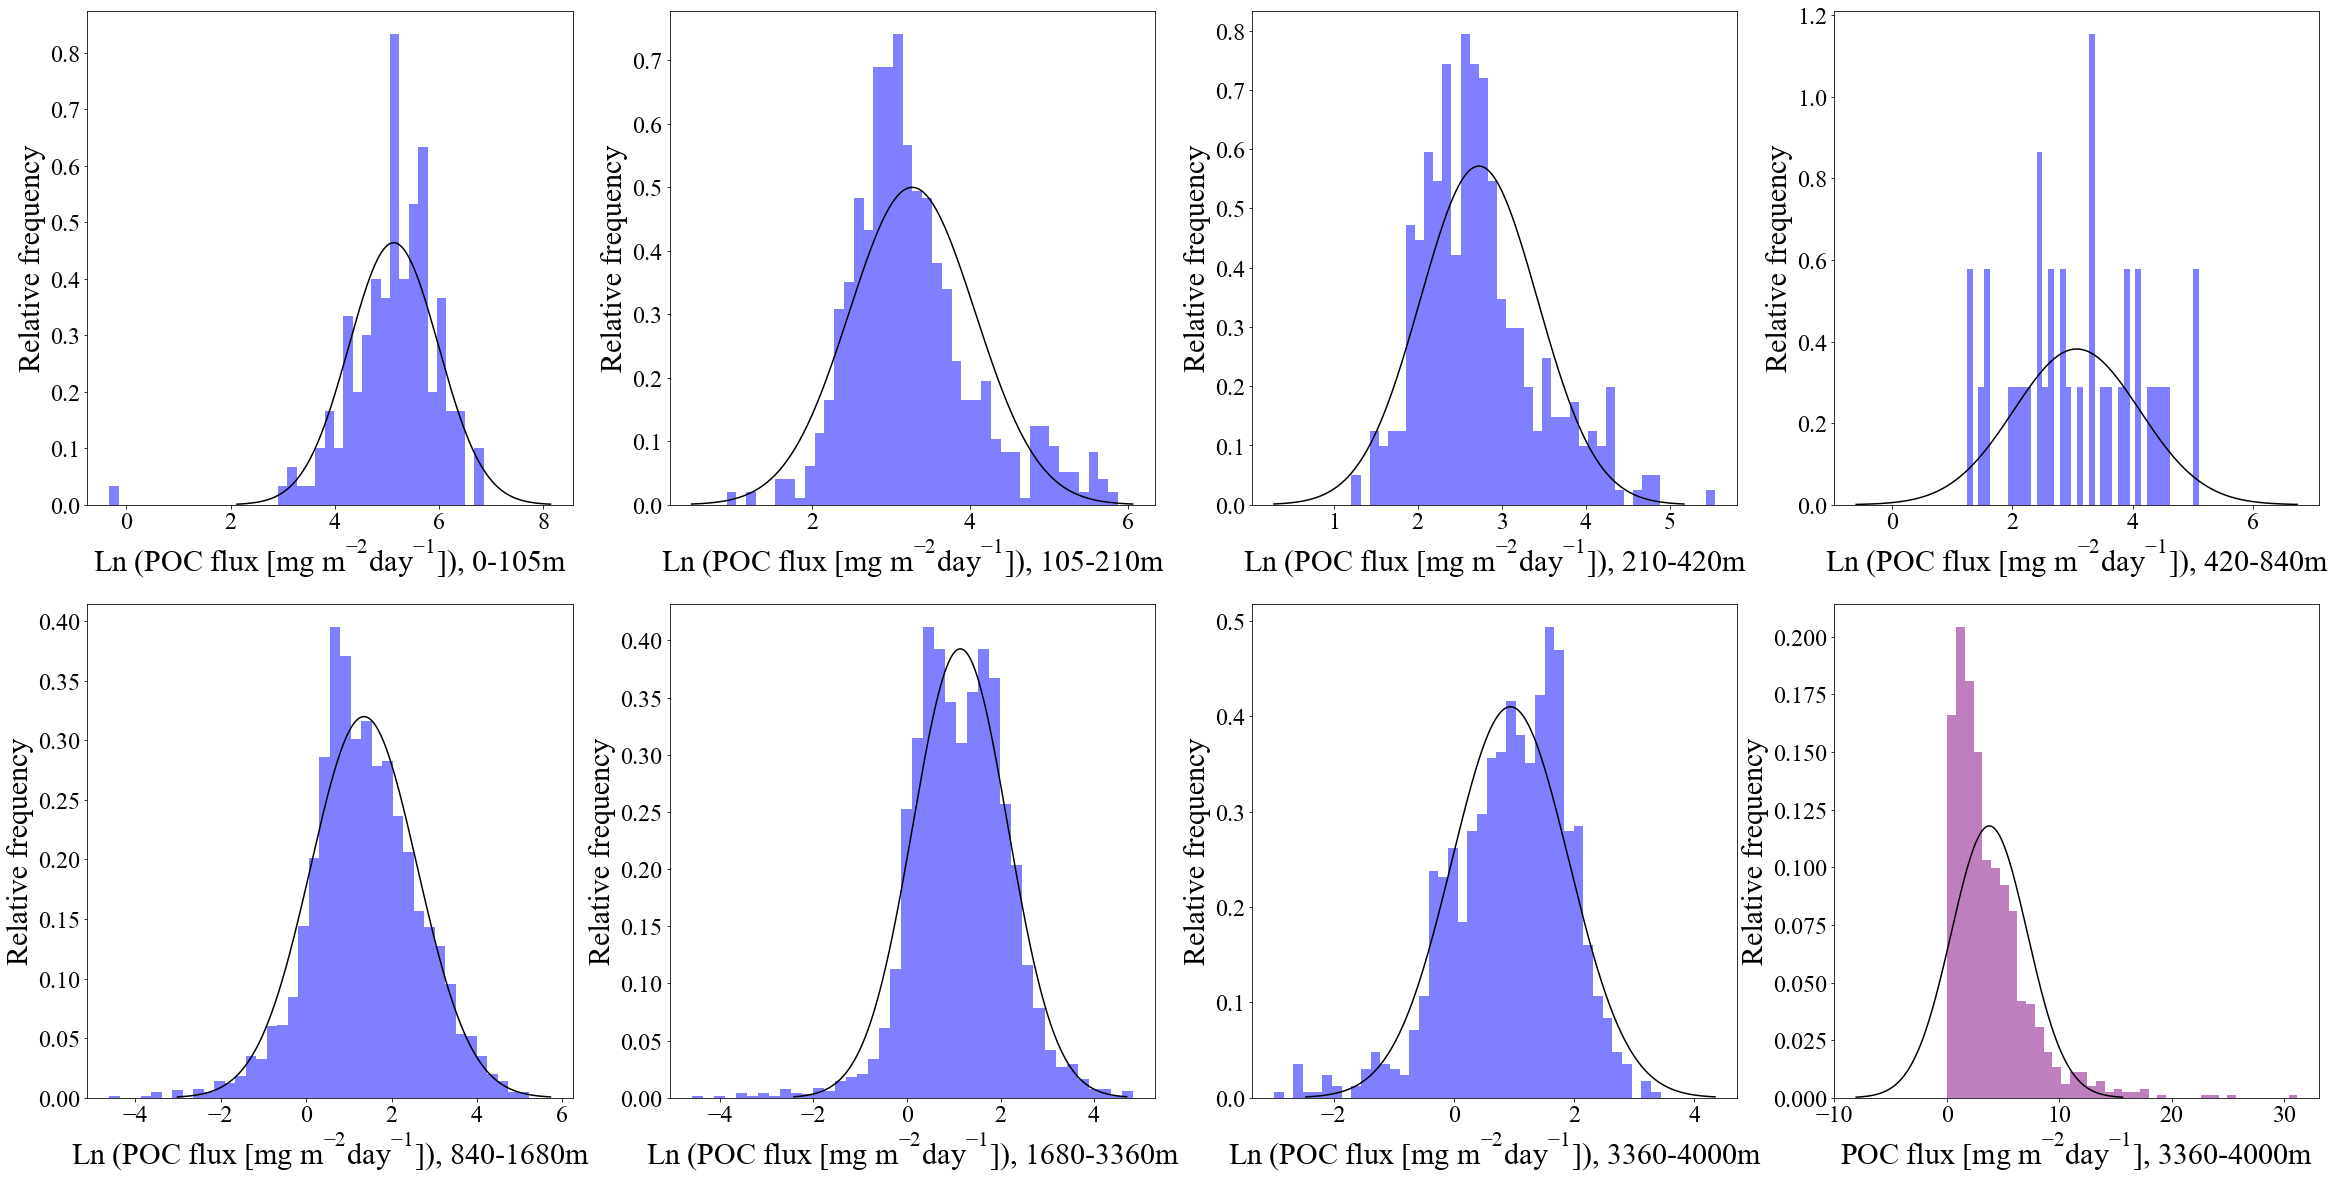

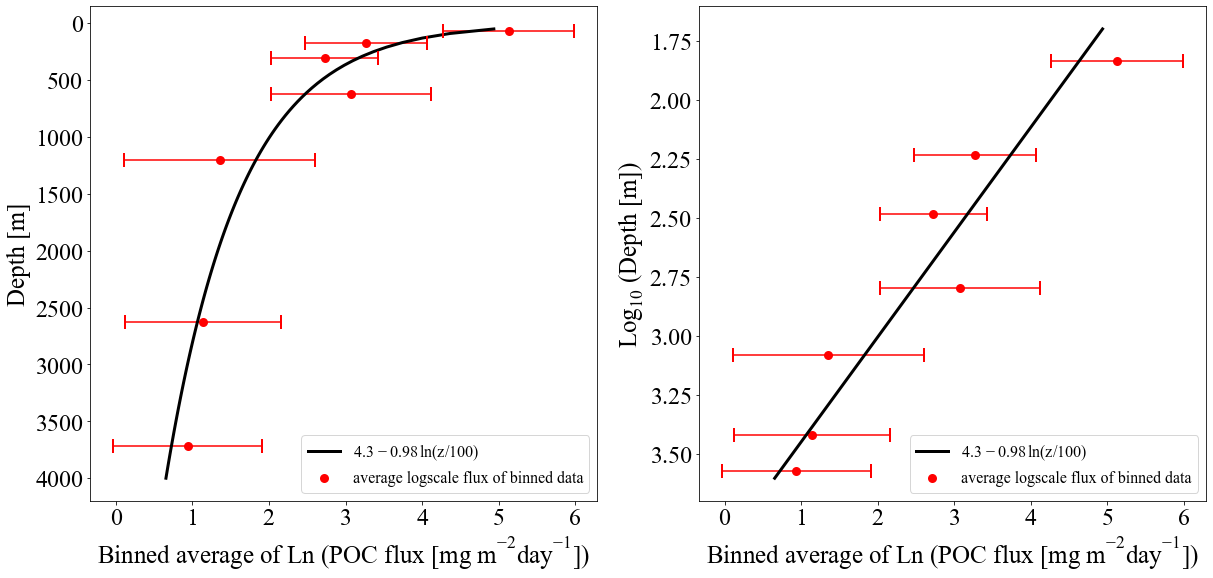

In [6]:
""" Summary histograms and scatterplot of the dataset binned into depth ranges. """
""" Intended to demonstrate the qualitative appeal of the lognormal power law model. """

# place data points in bins of depth range 0-105, 105-210, 210-420, etc.
# generate summary statistics for each bin.
binned_model = make_binned_fit_data(data, "logscale", 
                                            slice_len=105, scale_factor=2)

# plot a histogram of the flux measurements in each bin with gaussian distributions overlaid.
plot_binned_histograms(binned_model)

# plot the mean flux vs mean depth for each bin. 
# add error bars equal to the standard deviation of each bin.
# overlay the best fit power law.
plot_binned_model_scatterplot(binned_model)

A = 3.6620040125783424
B = -0.8128888986097752
variance = 1.184591844494826


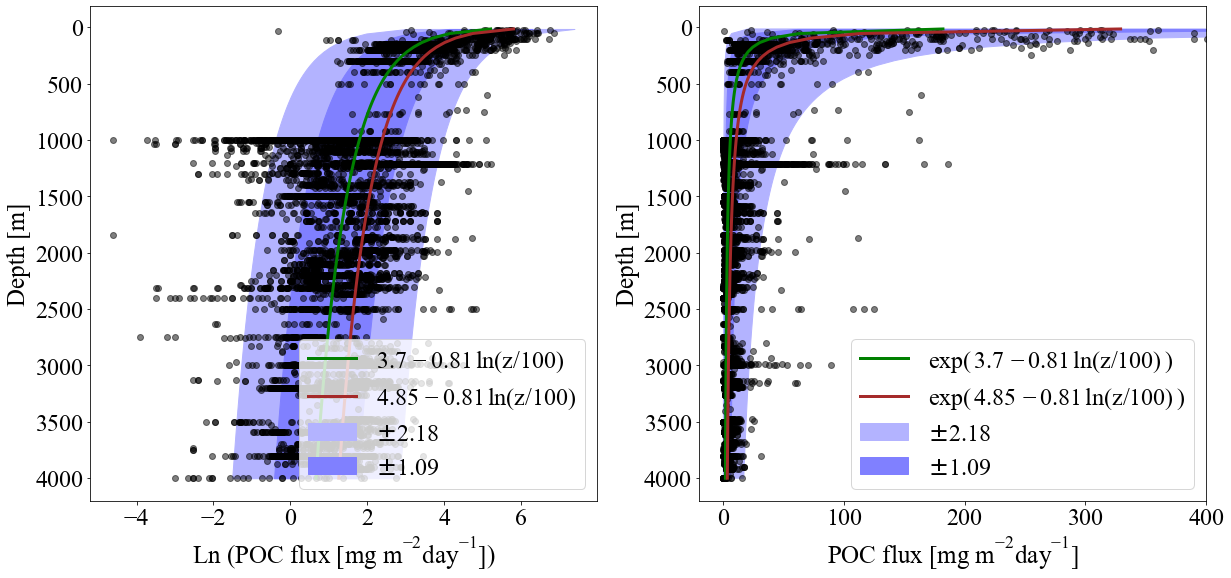

In [7]:
""" Scatterplot of dataset with the best fit power law and standard deviation intervals overlaid. """

param_model = lin_reg_power_law(data)
[A, B, var] = param_model
print('A = '+str(A))
print('B = '+str(B))
print('variance = '+str(var))

plot_full_scatterplot_with_parameters(data, 
                                      A, B, var, display_mean = True)

A = 3.6620040125783424
B = -0.8128888986097752
variance = 1.184591844494826
mean z-score: 3.405376719853282e-17
st. dev. of z-scores: 0.9999999999999993


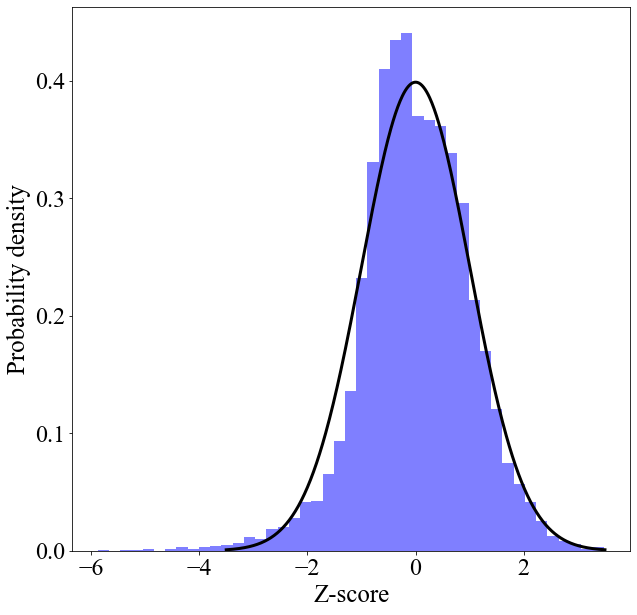

In [8]:
""" Histogram of normalized residuals of logs of flux values against the best fit power law, i.e., z-scores. """

param_model = lin_reg_power_law(data)
[A, B, var] = param_model
print('A = '+str(A))
print('B = '+str(B))
print('variance = '+str(var))
# same parameter values as before, generated by the same linear regression

plot_zscore_hist(data, A, B, var)

In [9]:
""" no longer using """
""" left over from old (black magic) method of generating z-score plot. takes a very long time to run. """

#for below 1000m
#Arange=np.around(np.arange(1.65, 1.75, 0.01), decimals=4)
#Brange=np.around(np.arange(-0.4, -.3, 0.01), decimals=4)
#varrange=np.around(np.arange(1.15, 1.25, 0.01), decimals=4)

#for all data
#Arange=np.around(np.arange(2.2, 2.3, 0.01), decimals=4)
#Brange=np.around(np.arange(-0.8, -.65, 0.01), decimals=4)
#varrange=np.around(np.arange(1.1, 1.25, 0.01), decimals=4)

#optimal_params_all = min_error(Arange, Brange, varrange, data)[0][0]
#print(optimal_params_all)

#zscore_params = iterated_min_error(Arange, Brange, varrange, data, 10)

#print('\n'.join(str(x) for x in zscore_params[:-1]))

#[(zmean_A, zvar_A), (zmean_B, zvar_B), (zmean_var, zvar_var), zparamlist] = zscore_params

#plot_zscore_hist(data, zmean_A, zmean_B, zmean_var)

' left over from old (black magic) method of generating z-score plot. takes a very long time to run. '